<a href="https://colab.research.google.com/github/SarahBlevin/AAA_Project_Internet_addicts/blob/main/AAA_InternetAddicts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAA Project - FPS benchmark

This project's goal is to predict the FPS (numerical value) of video games executed on computers, using machine learning.

The dataset used in this project can be found here: https://www.kaggle.com/datasets/ulrikthygepedersen/fps-benchmark

or here: https://www.openml.org/search?type=data&status=active&id=42737

# Imports and Utility functions

In [12]:
# All lib imports
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import zipfile
import urllib.request
import pandas as pd


In [13]:
# To plot pretty figures
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_NAME = "fps_benchmark"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_NAME)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the data

In [14]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/SarahBlevin/AAA_Project_Internet_addicts/master/"
FPS_BENCHMARK_PATH = os.path.join("dataset", "fps_benchmark")
FPS_BENCHMARK_URL = DOWNLOAD_ROOT + "dataset/fps_benchmark.zip"

def fetch_fps_benchmark_data(fps_benchmark_url=FPS_BENCHMARK_URL, fps_benchmark_path=FPS_BENCHMARK_PATH):
    if not os.path.isdir(fps_benchmark_path):
        os.makedirs(fps_benchmark_path)
    zip_path = os.path.join(fps_benchmark_path, "fps_benchmark.zip")
    urllib.request.urlretrieve(fps_benchmark_url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as fps_benchmark_zip:
      fps_benchmark_zip.extractall(path=fps_benchmark_path)
    print("Extracted files:", os.listdir(fps_benchmark_path))

In [15]:
fetch_fps_benchmark_data()

Extracted files: ['fps_benchmark.zip', 'fps_benchmark_dataset']


In [16]:
def load_fps_benchmark_data(fps_benchmark_path=FPS_BENCHMARK_PATH):
    csv_path = os.path.join(fps_benchmark_path, "fps_benchmark_dataset","fps_benchmark.csv")
    return pd.read_csv(csv_path)

# Data analysis


In [17]:
fps_benchmark_data = load_fps_benchmark_data()
fps_benchmark_data.head()

,CpuName,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL2,CpuCacheL3,CpuDieSize,CpuFrequency,CpuMultiplier,...,GpuShaderModel,GpuNumberOfShadingUnits,GpuNumberOfTMUs,GpuTextureRate,GpuNumberOfTransistors,GpuVulkan,GameName,GameResolution,GameSetting,FPS
0,b'Intel Core i9-9900K',8.0,16.0,100.0,512.0,2048.0,16.0,NaN,3600.0,36.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',225.3
1,b'Intel Core i7-9700K',8.0,8.0,100.0,512.0,2048.0,12.0,NaN,3600.0,36.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',223.3
2,b'Intel Core i7-8700K',6.0,12.0,100.0,384.0,1536.0,12.0,NaN,3700.0,37.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',207.3
3,b'Intel Core i7-7700K',4.0,8.0,100.0,256.0,1024.0,8.0,NaN,4200.0,42.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',201.3
4,b'Intel Core i5-9400F',6.0,6.0,100.0,384.0,1536.0,9.0,NaN,2900.0,29.0,...,b'6.5',4352.0,272.0,420200.0,18600.0,b'1.2.131',b'callOfDutyWW2',1080.0,b'med',199.2


In [18]:
fps_benchmark_data.info()
# GpuNumberOfExecutionUnits is completely empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24624 entries, 0 to 24623
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CpuName                    24624 non-null  object 
 1   CpuNumberOfCores           24624 non-null  float64
 2   CpuNumberOfThreads         24624 non-null  float64
 3   CpuBaseClock               24624 non-null  float64
 4   CpuCacheL1                 24624 non-null  float64
 5   CpuCacheL2                 24624 non-null  float64
 6   CpuCacheL3                 24624 non-null  float64
 7   CpuDieSize                 11664 non-null  float64
 8   CpuFrequency               24624 non-null  float64
 9   CpuMultiplier              24624 non-null  float64
 10  CpuMultiplierUnlocked      24624 non-null  object 
 11  CpuProcessSize             24624 non-null  float64
 12  CpuTDP                     24624 non-null  float64
 13  CpuNumberOfTransistors     11664 non-null  flo

In [19]:
# 30 video games are available for predictions
fps_benchmark_data['GameName'].value_counts()

,count
GameName,
b'callOfDutyWW2',1026
b'fortnite',1026
b'grandTheftAuto5',1026
b'rainbowSixSiege',1026
b'starcraft2',1026
b'farCry5',1026
b'battletech',1026
b'airMechStrike',1026
b'warframe',1026


In [20]:
fps_benchmark_data.describe()

,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL2,CpuCacheL3,CpuDieSize,CpuFrequency,CpuMultiplier,CpuProcessSize,...,GpuMemorySize,GpuPixelRate,GpuProcessSize,GpuNumberOfROPs,GpuNumberOfShadingUnits,GpuNumberOfTMUs,GpuTextureRate,GpuNumberOfTransistors,GameResolution,FPS
count,24624.000000,24624.000000,24624.0,24624.000000,24624.000000,24624.000000,11664.000000,24624.000000,24624.000000,24624.000000,...,24624.000000,24624.000000,24624.000000,24624.000000,24624.00000,24624.000000,24624.000000,24624.000000,24624.0,24624.000000
mean,6.315789,10.842105,100.0,515.368421,2506.105263,18.210526,0.000126,3589.473684,35.894737,11.947368,...,7333.333333,89045.925926,15.259259,57.777778,2237.62963,139.851852,215336.296296,8377.777778,1080.0,123.959369
std,2.078823,5.203982,0.0,233.521609,1398.698066,14.229906,0.000059,317.719889,3.177199,3.017095,...,2775.611026,28211.657786,5.783828,19.023439,866.31581,54.144738,83501.932511,3533.754477,0.0,54.610080
min,2.000000,4.000000,100.0,128.000000,512.000000,3.000000,0.000074,2800.000000,28.000000,7.000000,...,3000.000000,36430.000000,7.000000,24.000000,768.00000,48.000000,66820.000000,3300.000000,1080.0,22.200000
25%,6.000000,6.000000,100.0,384.000000,1536.000000,9.000000,0.000074,3400.000000,34.000000,7.000000,...,6000.000000,68360.000000,12.000000,48.000000,1536.00000,96.000000,157100.000000,5700.000000,1080.0,83.600000
50%,6.000000,12.000000,100.0,512.000000,2048.000000,16.000000,0.000074,3600.000000,36.000000,14.000000,...,8000.000000,86400.000000,14.000000,64.000000,2304.00000,144.000000,202000.000000,7200.000000,1080.0,114.300000
75%,8.000000,16.000000,100.0,576.000000,3072.000000,32.000000,0.000192,3800.000000,38.000000,14.000000,...,8000.000000,109400.000000,16.000000,64.000000,2560.00000,160.000000,277300.000000,10800.000000,1080.0,154.100000
max,12.000000,24.000000,100.0,1152.000000,6144.000000,64.000000,0.000192,4200.000000,42.000000,14.000000,...,16000.000000,139200.000000,28.000000,96.000000,4352.00000,272.000000,420200.000000,18600.000000,1080.0,396.400000


Saving figure attribute_histogram_plots


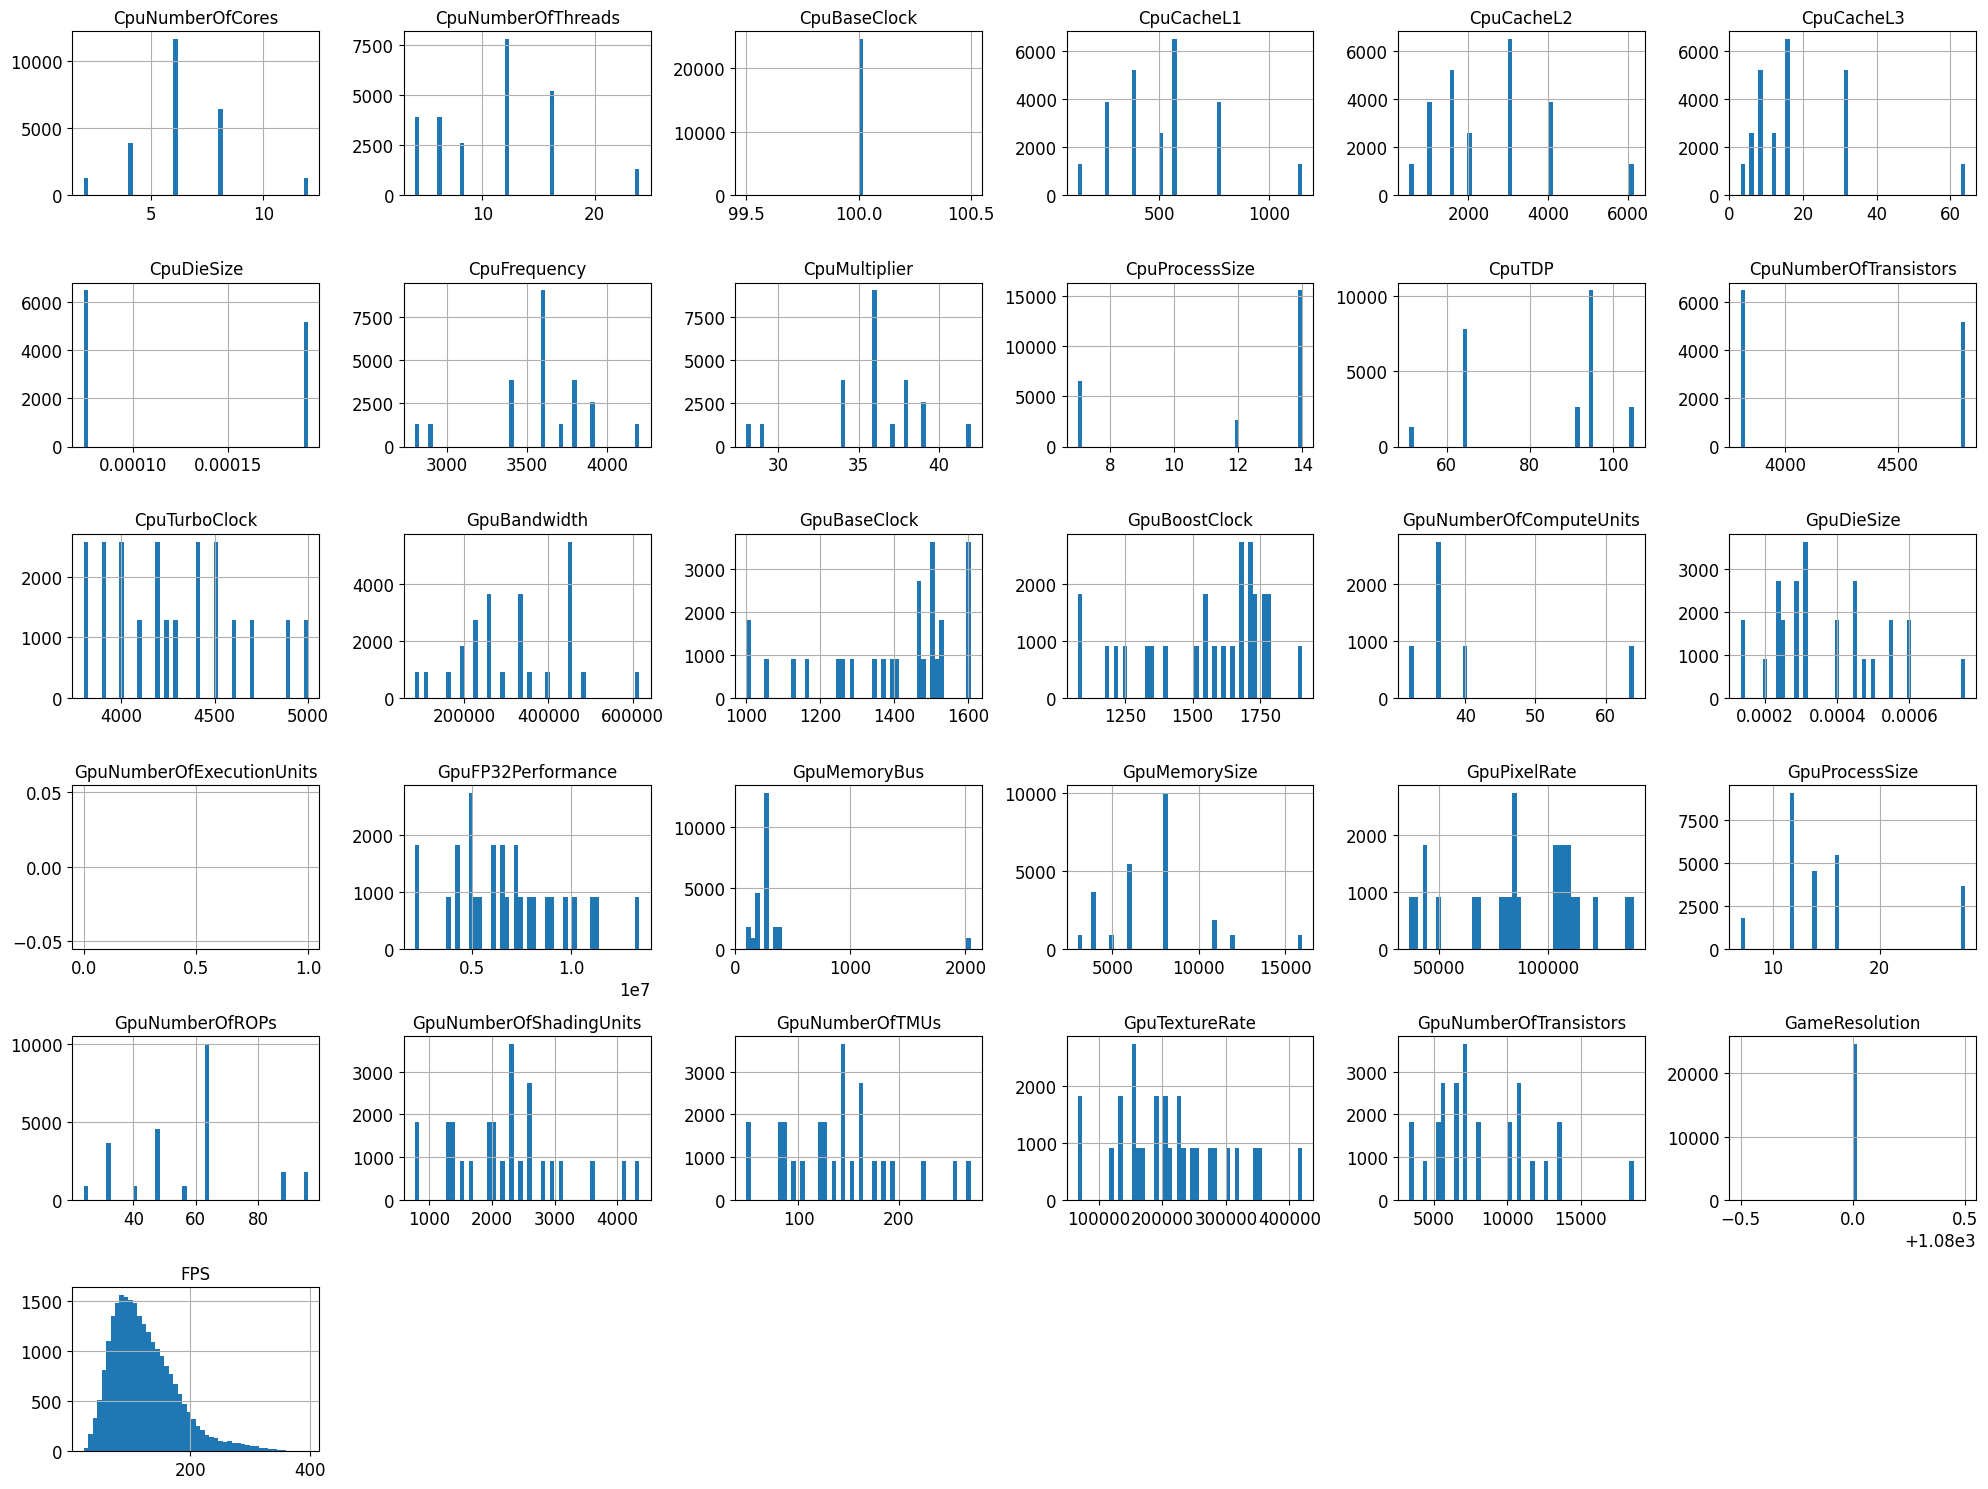

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
fps_benchmark_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()